# Clientes de uma operadora de cartão de crédito (K-means)
Péricles S. G. Marques / Contato: https://www.linkedin.com/in/periclessavio/

### Objetivo:
Categorizar os clientes de uma operadora de cartão de crédito. Analisar os grupos de clientes mais e menos leais à marca (por meio do uso).

##### Importação da base de dados e os primeiros passos

In [15]:
import pandas as pd #biblioteca para manipular dataframes
cartao_credito = pd.read_csv('cartao_credito.csv') # carrega o arquivo com os dados
cartao_credito.head(5) # mostra as primeiras 5 linhas

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [16]:
cartao_credito.describe() #estatísticas descritivas, equivale ao "summary() do R"

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


##### Padronização dos dados

In [17]:
from sklearn.preprocessing import StandardScaler #biblioteca que faz a padronização/normalização (ZScore)

cartao_credito_subset = cartao_credito.iloc[:,2:] # vatiando o dataset [:, 1:] = [todas as linhas, coluna 1 até o final (no python os índices começam com 0)]

ss = StandardScaler() #chamar a função
cartao_credito_padronizado = ss.fit_transform(cartao_credito_subset) #normalizar
cartao_credito_padronizado

array([[ 1.74018685, -1.24922476, -0.86045063, -0.54748969, -1.25153737],
       [ 0.41029254, -0.78758515, -1.47373077,  2.5205186 ,  1.89185881],
       [ 0.41029254,  1.05897329, -0.86045063,  0.13428993,  0.1455276 ],
       ...,
       [ 2.93709172,  1.5206129 , -0.86045063,  2.17962879, -0.90227113],
       [ 3.65523464,  2.44389211, -0.86045063,  4.22496765, -1.25153737],
       [ 3.52224521,  1.9822525 , -1.47373077,  3.20229822, -0.55300488]])

##### Organização do dataset

In [18]:
cartao_credito_padronizado_df = pd.DataFrame(cartao_credito_padronizado)
cartao_credito_padronizado_df = pd.concat([cartao_credito[['Sl_No', 'Customer Key']], cartao_credito_padronizado_df], axis=1) #concatenar dataframes
cartao_credito_padronizado_df

,Sl_No,Customer Key,0,1,2,3,4
0,1,87073,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,2,38414,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,3,17341,0.410293,1.058973,-0.860451,0.134290,0.145528
3,4,40496,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,5,47437,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...,...,...
655,656,51108,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,657,60732,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,658,53834,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,659,80655,3.655235,2.443892,-0.860451,4.224968,-1.251537


In [19]:
cartao_credito_padronizado_df.columns = ['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'] # renomear as colunas
cartao_credito_padronizado_df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,2,38414,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,3,17341,0.410293,1.058973,-0.860451,0.134290,0.145528
3,4,40496,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,5,47437,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...,...,...
655,656,51108,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,657,60732,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,658,53834,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,659,80655,3.655235,2.443892,-0.860451,4.224968,-1.251537


##### Verificar se as variáveis têm média = 0 e desvio padrão = 1.

In [20]:
import numpy as np # biblioteca para usar as funções mean() e std() (média e desvio padrão)

print('MÉDIA:')
for i in cartao_credito_padronizado_df.columns[2:]:
    
    print(i+':', round(cartao_credito_padronizado_df[i].mean()))

print('\nDESVIO PADRÃO:')
for i in cartao_credito_padronizado_df.columns[2:]:
    print(i+':', cartao_credito_padronizado_df[i].std().round())

MÉDIA:
Avg_Credit_Limit: 0
Total_Credit_Cards: 0
Total_visits_bank: 0
Total_visits_online: 0
Total_calls_made: 0

DESVIO PADRÃO:
Avg_Credit_Limit: 1.0
Total_Credit_Cards: 1.0
Total_visits_bank: 1.0
Total_visits_online: 1.0
Total_calls_made: 1.0


##### Visualização dos dados em 3D

In [21]:
import matplotlib.pyplot as plt
import plotly.express as px #biblioteca para realizar gráficos 3D e interativos
fig = px.scatter_3d(cartao_credito_padronizado_df, x='Avg_Credit_Limit', y='Total_Credit_Cards', z='Total_visits_bank', color='Total_visits_bank',  width=1000, height=700, labels={
                     "Avg_Credit_Limit": "Limite Médio",
                     "Total_Credit_Cards": "Nº Cartões",
                     "Total_visits_bank": "Nº Visitas"
                 })

fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

![](cartao_de_credito_3d_plot1.png "Gráfico 3D")

##### Método de Elbow para identificação do número ótimo de clusters

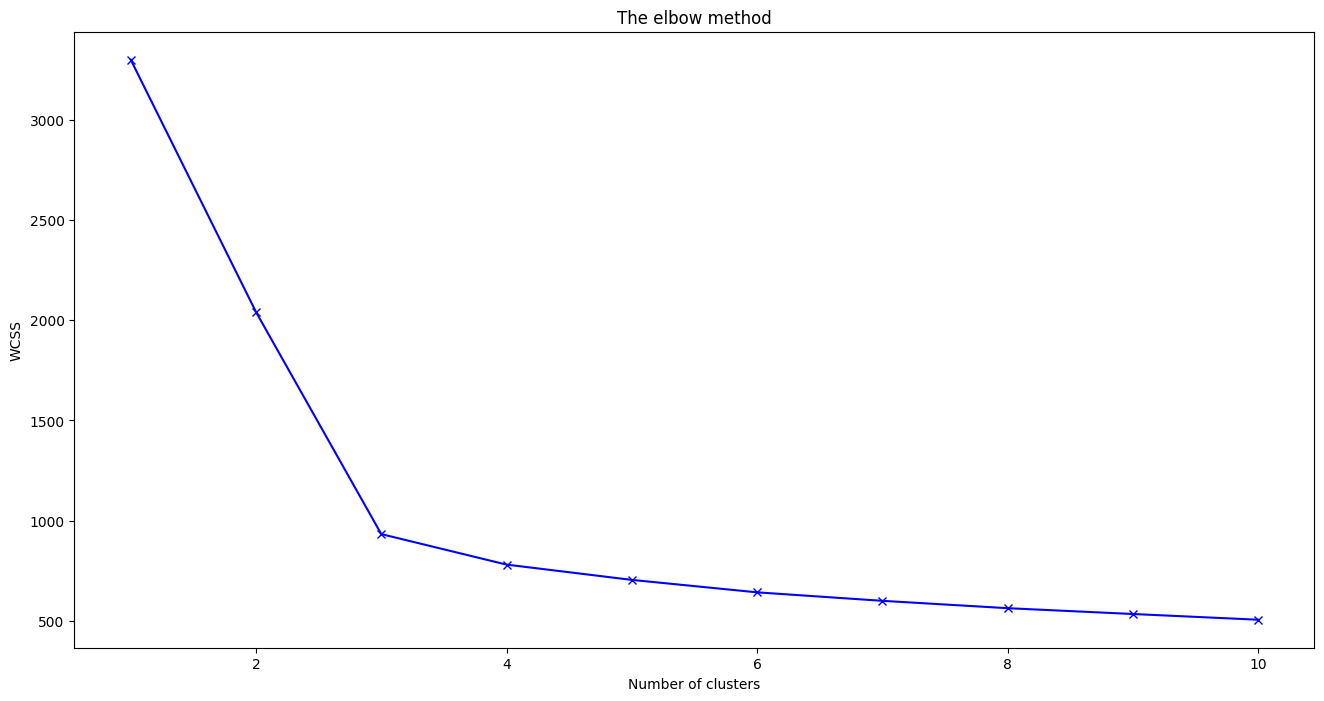

In [22]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 2)
    kmeans.fit(cartao_credito_padronizado)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

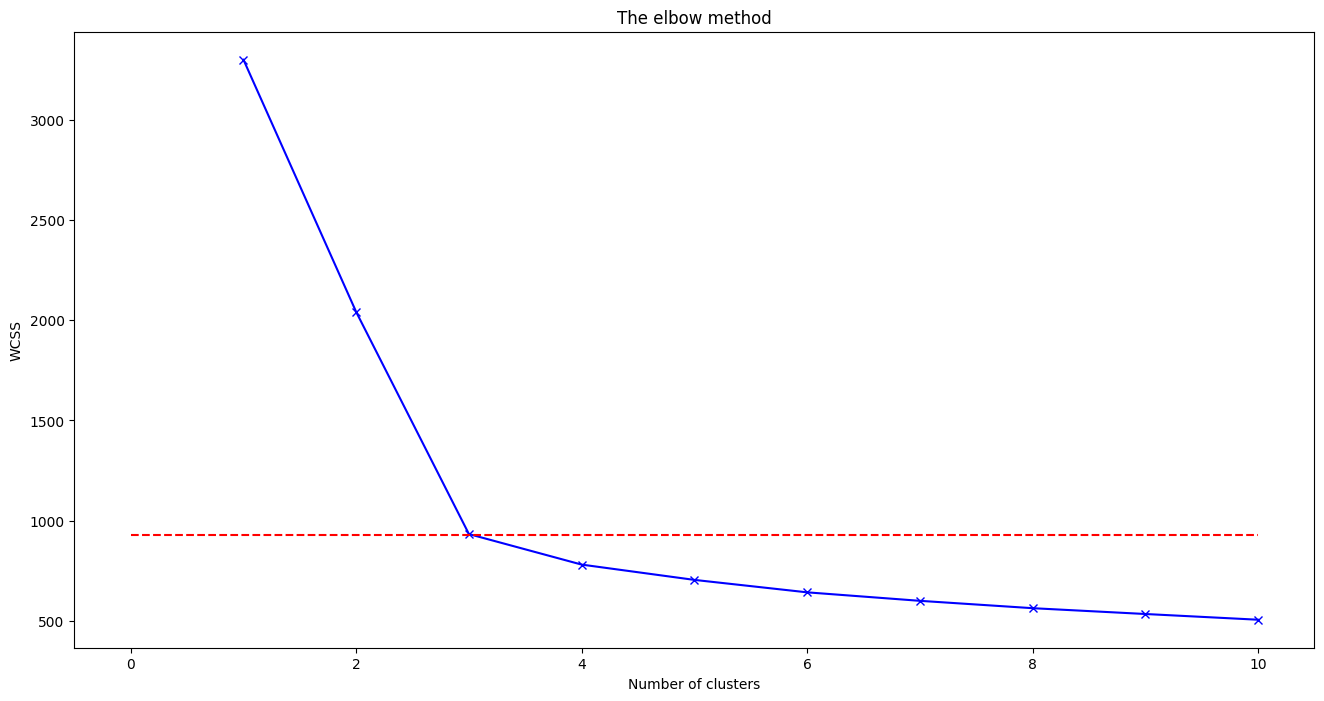

In [23]:
plt.figure(figsize=(16,8))
plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.hlines(930, 0, 10, colors='red', linestyles='dashed', label='')
plt.show()

##### Implementando o K-means

In [24]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(cartao_credito_padronizado)
cartao_credito['Cluster_K'] = y_kmeans
cartao_credito.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster_K
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,2


##### Contagem de clientes por cluster

In [25]:
df_clust = pd.DataFrame({'Clientes':cartao_credito['Sl_No'], 'Cluster':y_kmeans})
df_clust.groupby('Cluster').count().reset_index()

,Cluster,Clientes
0,0,386
1,1,224
2,2,50


##### Resultado final

In [26]:
fig = px.scatter_3d(cartao_credito, x='Avg_Credit_Limit', y='Total_Credit_Cards', z='Total_visits_bank', color='Cluster_K',  width=1000, height=700, labels={
                     "Avg_Credit_Limit": "Limite Médio",
                     "Total_Credit_Cards": "Nº Cartões",
                     "Total_visits_bank": "Nº Visitas"
                 })

fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

![](cartao_de_credito_3d_plot2.png "Gráfico 3D")

##### Analisando por meio de estatísticas descritivas

In [27]:
#bibliotecas para análise de variância (ANOVA)
import statsmodels.api as sm
from statsmodels.formula.api import ols
cartao_credito_padronizado_df['Cluster_K'] = y_kmeans

##### Anova

In [28]:
modelo_Avg_Credit_Limit = ols('Avg_Credit_Limit ~ Cluster_K', data=cartao_credito_padronizado_df).fit()
modelo_Total_Credit_Cards = ols('Total_Credit_Cards ~ Cluster_K', data=cartao_credito_padronizado_df).fit()
modelo_Total_visits_bank = ols('Total_visits_bank ~ Cluster_K', data=cartao_credito_padronizado_df).fit()
modelo_Total_visits_online = ols('Total_visits_online ~ Cluster_K', data=cartao_credito_padronizado_df).fit()
modelo_Total_calls_made = ols('Total_calls_made ~ Cluster_K', data=cartao_credito_padronizado_df).fit()

aov_Avg_Credit_Limit = sm.stats.anova_lm(modelo_Avg_Credit_Limit)
aov_Total_Credit_Cards = sm.stats.anova_lm(modelo_Total_Credit_Cards)
aov_Total_visits_bank = sm.stats.anova_lm(modelo_Total_visits_bank)
aov_Total_visits_online = sm.stats.anova_lm(modelo_Total_visits_online)
aov_Total_calls_made = sm.stats.anova_lm(modelo_Total_calls_made)

print(f'Avg_Credit_Limit\n{aov_Avg_Credit_Limit}\n\n')
print(f'Total_Credit_Cards\n{aov_Total_Credit_Cards}\n\n')
print(f'Total_visits_bank\n{aov_Total_visits_bank}\n\n')
print(f'Total_visits_online\n{aov_Total_visits_online}\n\n')
print(f'Total_calls_made\n{aov_Total_calls_made}')

Avg_Credit_Limit
              df      sum_sq    mean_sq          F        PR(>F)
Cluster_K    1.0   84.604186  84.604186  96.750016  2.155070e-21
Residual   658.0  575.395814   0.874462        NaN           NaN


Total_Credit_Cards
              df      sum_sq   mean_sq         F    PR(>F)
Cluster_K    1.0    9.868339  9.868339  9.987773  0.001648
Residual   658.0  650.131661  0.988042       NaN       NaN


Total_visits_bank
              df      sum_sq     mean_sq           F         PR(>F)
Cluster_K    1.0  368.628734  368.628734  832.469551  6.189240e-119
Residual   658.0  291.371266    0.442813         NaN            NaN


Total_visits_online
              df      sum_sq     mean_sq            F         PR(>F)
Cluster_K    1.0  475.886989  475.886989  1700.768659  1.400449e-184
Residual   658.0  184.113011    0.279807          NaN            NaN


Total_calls_made
              df      sum_sq     mean_sq           F        PR(>F)
Cluster_K    1.0  108.750006  108.750006  129.80953